In [2]:
%pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 18.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 60.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 76.4 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 50.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
  Consider ad

In [1]:
# Descomprimir archivo
import os
import zipfile

with zipfile.ZipFile("Dataset-Brain-MRI-Tumor-Detection.zip", "r") as zip_ref:
    zip_ref.extractall()

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

2024-10-27 18:02:39.004678: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 18:02:39.208565: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-27 18:02:39.435763: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730052159.568977    4635 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730052159.605270    4635 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 18:02:39.992276: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Crear un generador de datos con aumento
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Reserva un 20% para validación
)

# Cargar datos de entrenamiento
train_generator = datagen.flow_from_directory(
    'dataset/',  # Cambia esta ruta según tu estructura de carpetas
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',  # Usar subset para entrenamiento
    shuffle=True
)

# Cargar datos de validación
validation_generator = datagen.flow_from_directory(
    'dataset/',  # Cambia esta ruta según tu estructura de carpetas
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',  # Usar subset para validación
    shuffle=True
)

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [3]:
# Cargar el modelo MobileNetV2 sin las capas superiores
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
base_model.trainable = False

2024-10-27 18:02:49.635099: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),  # Añadir Dropout
    Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20,  # Puedes ajustar el número de épocas
)

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


2024-10-27 18:02:58.689707: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-10-27 18:02:58.779690: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51380224 exceeds 10% of free system memory.
2024-10-27 18:02:58.817774: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25690112 exceeds 10% of free system memory.
2024-10-27 18:02:58.831236: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.
2024-10-27 18:02:58.895637: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156905472 exceeds 10% of free system memory.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.6690 - loss: 0.7397

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 836ms/step - accuracy: 0.6712 - loss: 0.7423 - val_accuracy: 0.8750 - val_loss: 0.2714
Epoch 2/20
1/6 ━━━━━━━━━━━━━━━━━━━━ 2s 472ms/step - accuracy: 0.8125 - loss: 0.3398

2024-10-27 18:03:03.932871: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/local/python/3.12.1/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.8125 - loss: 0.3398 - val_accuracy: 0.7222 - val_loss: 1.0367
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 422ms/step - accuracy: 0.7930 - loss: 1.0694
Epoch 4/20


2024-10-27 18:03:07.339007: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.8125 - loss: 0.5910 - val_accuracy: 0.9375 - val_loss: 0.3262
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 476ms/step - accuracy: 0.8464 - loss: 0.5715 - val_accuracy: 0.8889 - val_loss: 0.5430
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.3846  
Epoch 7/20


2024-10-27 18:03:11.820559: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 570ms/step - accuracy: 0.8972 - loss: 0.2907 - val_accuracy: 0.8750 - val_loss: 0.4149
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8438 - loss: 0.7982 - val_accuracy: 0.9444 - val_loss: 0.3906
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 392ms/step - accuracy: 0.8965 - loss: 0.2399
Epoch 10/20
1/6 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step - accuracy: 0.8438 - loss: 0.7249

2024-10-27 18:03:18.875325: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.8438 - loss: 0.7249 - val_accuracy: 0.8125 - val_loss: 0.9148
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 430ms/step - accuracy: 0.8895 - loss: 0.4100 - val_accuracy: 0.8333 - val_loss: 0.4048
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.6368  
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 588ms/step - accuracy: 0.8845 - loss: 0.3542 - val_accuracy: 0.8438 - val_loss: 0.6604
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0276 - val_accuracy: 0.9444 - val_loss: 0.1722
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 462ms/step - accuracy: 0.9256 - loss: 0.2993
Epoch 16/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.7812 - loss: 1.3464 - val_accuracy: 0.9062 - val_loss: 0.3011
Epoch 17/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 419ms/step - accuracy: 0.8659 - loss: 0.5142 - val_accuracy: 0.8889 - val_loss: 0.7118
Epoch 18/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 1.224

2024-10-27 18:03:37.406122: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


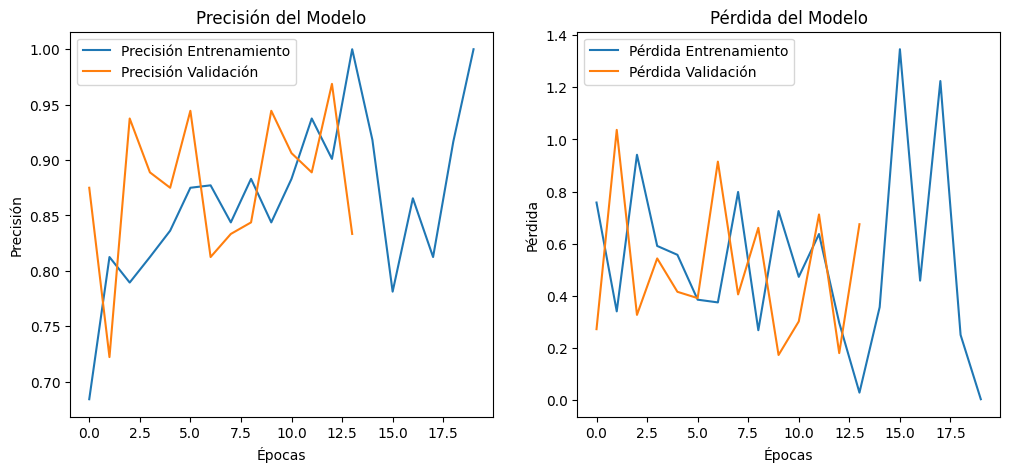

In [6]:
# Graficar precisión y pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [7]:
# Evaluación del modelo en los mismos datos
loss, accuracy = model.evaluate(train_generator)
print(f'Precisión final en el conjunto de datos: {accuracy:.4f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 380ms/step - accuracy: 0.9272 - loss: 0.2349
Precisión final en el conjunto de datos: 0.9212


In [8]:
# Guardar el modelo
model.save('tumor_detection_model.keras')

In [9]:
# Guardar el modelo
model.save('TDM_Model.h5')

In [12]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Ruta de la imagen que quieres predecir
img_path = 'yes/Y2.jpg'

# Cargar la imagen con el tamaño adecuado
img = image.load_img(img_path, target_size=(224, 224))

# Convertir la imagen a un array numpy
img_array = image.img_to_array(img)

# Añadir una dimensión extra para que tenga el formato (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Escalar los valores de los píxeles entre 0 y 1
img_array /= 255.0

# Realizar la predicción
prediction = model.predict(img_array)

# Interpretar la predicción
if prediction[0] > 0.5:
    print("La imagen tiene un tumor.")
else:
    print("La imagen no tiene un tumor.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
La imagen tiene un tumor.


# **Predicción**

In [38]:
# Cargar el modelo previamente entrenado
model = tf.keras.models.load_model('models/TDM_Model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


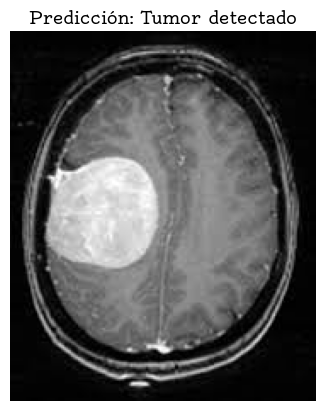

In [29]:
import matplotlib.font_manager as fm

import warnings

# Ocultar advertencias de Matplotlib
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Ruta a la fuente personalizada
font_path = '/workspaces/codespaces-blank/Oldenburg-Regular.ttf'  # Ajusta la ruta si es necesario

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)  # Registrar la fuente en el gestor de fuentes

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

# Etiquetas descriptivas
labels = {
    'yes': 'Tumor detectado',
    'no': 'Sin tumor'
}

def predict_and_show(img_path):
    # Cargar la imagen y redimensionarla
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normalizar la imagen
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones para el modelo
    
    # Realizar la predicción
    prediction = model.predict(img_array)
    class_label = 'yes' if prediction[0][0] > 0.5 else 'no'
    descriptive_label = labels[class_label]
    
    # Mostrar la imagen con el título descriptivo
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicción: {descriptive_label}', fontweight='bold', fontproperties=font_prop, fontsize=13)
    plt.axis('off')
    plt.show()

# Ruta de la imagen a predecir
img_path = 'yes/Y1.jpg'  # Cambia esto a la ruta de tu imagen

# Ejecutar la predicción y mostrar la imagen
predict_and_show(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step


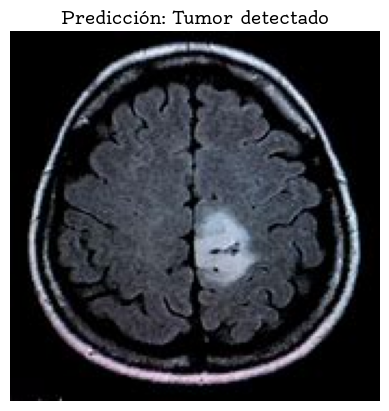

In [39]:
import matplotlib.font_manager as fm

import warnings

# Ocultar advertencias de Matplotlib
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Ruta a la fuente personalizada
font_path = '/workspaces/codespaces-blank/Oldenburg-Regular.ttf'  # Ajusta la ruta si es necesario

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)  # Registrar la fuente en el gestor de fuentes

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

# Etiquetas descriptivas
labels = {
    'yes': 'Tumor detectado',
    'no': 'Sin tumor'
}

def predict_and_show(img_path):
    # Cargar la imagen y redimensionarla
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normalizar la imagen
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones para el modelo
    
    # Realizar la predicción
    prediction = model.predict(img_array)
    class_label = 'yes' if prediction[0][0] > 0.5 else 'no'
    descriptive_label = labels[class_label]
    
    # Mostrar la imagen con el título descriptivo
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicción: {descriptive_label}', fontweight='bold', fontproperties=font_prop, fontsize=13)
    plt.axis('off')
    plt.show()

# Ruta de la imagen a predecir
img_path = 'manual-validation/img-yes-tumor-validation.png'  # Cambia esto a la ruta de tu imagen

# Ejecutar la predicción y mostrar la imagen
predict_and_show(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


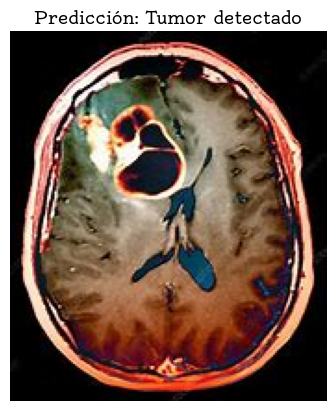

In [36]:
import matplotlib.font_manager as fm

import warnings

# Ocultar advertencias de Matplotlib
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Ruta a la fuente personalizada
font_path = '/workspaces/codespaces-blank/Oldenburg-Regular.ttf'  # Ajusta la ruta si es necesario

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)  # Registrar la fuente en el gestor de fuentes

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

# Etiquetas descriptivas
labels = {
    'yes': 'Tumor detectado',
    'no': 'Sin tumor'
}

def predict_and_show(img_path):
    # Cargar la imagen y redimensionarla
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normalizar la imagen
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones para el modelo
    
    # Realizar la predicción
    prediction = model.predict(img_array)
    class_label = 'yes' if prediction[0][0] > 0.5 else 'no'
    descriptive_label = labels[class_label]
    
    # Mostrar la imagen con el título descriptivo
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicción: {descriptive_label}', fontweight='bold', fontproperties=font_prop, fontsize=13)
    plt.axis('off')
    plt.show()

# Ruta de la imagen a predecir
img_path = 'manual-validation/img-tumor-yes-validation-2.png'  # Cambia esto a la ruta de tu imagen

# Ejecutar la predicción y mostrar la imagen
predict_and_show(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


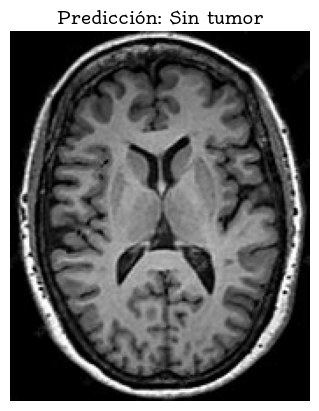

In [35]:
import matplotlib.font_manager as fm

import warnings

# Ocultar advertencias de Matplotlib
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Ruta a la fuente personalizada
font_path = '/workspaces/codespaces-blank/Oldenburg-Regular.ttf'  # Ajusta la ruta si es necesario

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)  # Registrar la fuente en el gestor de fuentes

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

# Etiquetas descriptivas
labels = {
    'yes': 'Tumor detectado',
    'no': 'Sin tumor'
}

def predict_and_show(img_path):
    # Cargar la imagen y redimensionarla
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0  # Normalizar la imagen
    img_array = np.expand_dims(img_array, axis=0)  # Expandir dimensiones para el modelo
    
    # Realizar la predicción
    prediction = model.predict(img_array)
    class_label = 'yes' if prediction[0][0] > 0.5 else 'no'
    descriptive_label = labels[class_label]
    
    # Mostrar la imagen con el título descriptivo
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicción: {descriptive_label}', fontweight='bold', fontproperties=font_prop, fontsize=13)
    plt.axis('off')
    plt.show()

# Ruta de la imagen a predecir
img_path = 'manual-validation/normal-brain.png'  # Cambia esto a la ruta de tu imagen

# Ejecutar la predicción y mostrar la imagen
predict_and_show(img_path)